In [ ]:
#@title Run this cell to initialise things { run: "auto" , display-mode: "form"}
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print('Done! Notebook initialised')

Done! Notebook initialised


In [ ]:
#@title Generate function to model curve { run: "auto" , display-mode: "form"}
def gaussian(x,a0=13,b=50,c=10):
  return a0 * np.exp(-1*(x-b)**2/(2*c**2))

print('Done! Generated function')

Done! Generated function


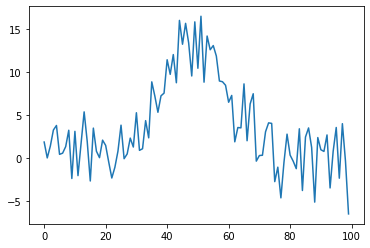

In [ ]:
#@title Generate noisy curve { run: "auto" , display-mode: "form"}
x = np.arange(0,100)
noise_scale = 0.2*13
noisy_curve = gaussian(x)+noise_scale*np.random.normal(0,1,100)
plt.plot(noisy_curve)

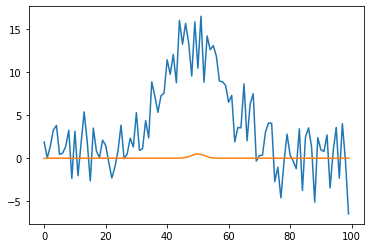

In [ ]:
#@title Tune parameters (Use sliders to adjust to get orange curve to match) { run: "auto" , display-mode: "form"}
Width = 5 #@param {type:"slider", min:0, max:100, step:1}
Amplitude = 0.5 #@param {type:"slider", min:0.5, max: 50, step: 0.5}
manual_tune = gaussian(x,a0=Amplitude,c=Width/(2*np.sqrt(2*np.log(2))))
plt.plot(noisy_curve)
plt.plot(manual_tune)

In [ ]:
#@title Lets use code to fit the curve instead { run: "auto" , display-mode: "form"}
a = Amplitude
b = 50
c = Width/2*np.sqrt(2*np.log(2))
fitting_results = curve_fit(gaussian,x,ydata = noisy_curve,p0=(a,b,c))

print('Fit amplitude: ' + str(fitting_results[0][0]))
print('Fit centre: ' + str(fitting_results[0][1]))
print('Fit width: ' +str(fitting_results[0][2]))

Fit amplitude: 13.72091536367131
Fit centre: 48.85977280932661
Fit width: -10.294100514539455


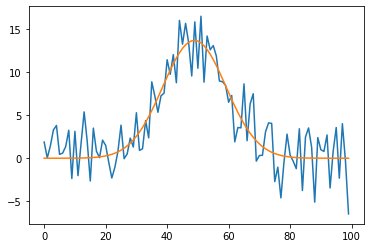

In [ ]:
#@title Check what the fit looks like { run: "auto" , display-mode: "form"}
fit_curve = gaussian(x,a0=fitting_results[0][0],b=fitting_results[0][1],c=fitting_results[0][2])
plt.plot(noisy_curve)
plt.plot(fit_curve)